In [2]:
import zipfile
import os
# Path to the zip file in Google Drive
zip_file_path = '/content/hcilab_driving_dataset.zip'
# Destination directory in Google Drive
destination_dir = '/content/drive/My Drive/HCI_Data'
# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_dir)



In [16]:
import os
# Set the folder path where the files are stored
folder_path = '/content/drive/MyDrive/HCI_Data/dataset_web'  # Update this path
# List all files in the folder
files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
# Print file paths to verify
print(files)


['/content/drive/MyDrive/HCI_Data/dataset_web/participant_1.csv', '/content/drive/MyDrive/HCI_Data/dataset_web/participant_10.csv', '/content/drive/MyDrive/HCI_Data/dataset_web/participant_2.csv', '/content/drive/MyDrive/HCI_Data/dataset_web/participant_3.csv', '/content/drive/MyDrive/HCI_Data/dataset_web/participant_4.csv', '/content/drive/MyDrive/HCI_Data/dataset_web/participant_5.csv', '/content/drive/MyDrive/HCI_Data/dataset_web/participant_6.csv', '/content/drive/MyDrive/HCI_Data/dataset_web/participant_7.csv', '/content/drive/MyDrive/HCI_Data/dataset_web/participant_8.csv', '/content/drive/MyDrive/HCI_Data/dataset_web/participant_9.csv']


In [17]:
import pandas as pd

# Initialize an empty list to store data from all participants
dataframes = []

# Loop through the files and read each CSV
for file in files:
    df = pd.read_csv(file, delimiter=';')  # Adjust delimiter if needed
    df['Participant'] = file.split('/')[-1].split('.')[0]  # Add a column to identify participants
    dataframes.append(df)

# Concatenate all data into a single DataFrame
all_data = pd.concat(dataframes, ignore_index=True)

# Display the shape and first few rows
print("Shape of the combined dataset:", all_data.shape)
print(all_data.head())


Shape of the combined dataset: (2298870, 23)
  Time_Biotrace Time_Videorating    Time_Light    Time_Accel      Time_GPS  \
0  17:19:06:007     00:00:00:000  17:19:05:909  17:19:05:893  17:17:40:230   
1  17:19:06:015     00:00:00:000  17:19:05:909  17:19:06:011  17:17:40:230   
2  17:19:06:023     00:00:00:000  17:19:05:909  17:19:06:011  17:17:40:230   
3  17:19:06:031     00:00:00:000  17:19:05:909  17:19:06:011  17:17:40:230   
4  17:19:06:039     00:00:00:000  17:19:05:909  17:19:06:011  17:17:40:230   

     AccelX     AccelY    AccelZ  Lightning  Latitude_GPS  ...  Speed_GPS  \
0 -0.421380   9.921572  0.076614  332.97314     48.747069  ...   0.331045   
1 -0.402226  10.017340  0.019154  332.97314     48.747069  ...   0.331045   
2 -0.402226  10.017340  0.019154  332.97314     48.747069  ...   0.331045   
3 -0.402226  10.017340  0.019154  332.97314     48.747069  ...   0.331045   
4 -0.402226  10.017340  0.019154  332.97314     48.747069  ...   0.331045   

   Bearing_GPS  Frame_V

In [20]:
print(all_data.columns)
# Display the first few entries of Time_Accel
print(all_data['Time_Accel'].head(10))

# Check for null or empty values
print("Missing or empty values in Time_Accel:", all_data['Time_Accel'].isna().sum())

# Parse the Time_Accel column to datetime
all_data['Time_Accel'] = pd.to_datetime(all_data['Time_Accel'], format='%H:%M:%S:%f', errors='coerce')

# Drop rows with invalid timestamps
all_data.dropna(subset=['Time_Accel'], inplace=True)

# Set Time_Accel as the index
all_data.set_index('Time_Accel', inplace=True)

# Check the updated DataFrame
print("Shape after parsing Time_Accel:", all_data.shape)
print(all_data.head())


Index(['Time_Biotrace', 'Time_Videorating', 'Time_Light', 'Time_Accel',
       'Time_GPS', 'AccelX', 'AccelY', 'AccelZ', 'Lightning', 'Latitude_GPS',
       'Longitude_GPS', 'Accuracy_GPS', 'Altitude_GPS', 'Speed_GPS',
       'Bearing_GPS', 'Frame_Videorating', 'Rating_Videorating', 'ECG', 'SCR',
       'Temp', 'HR', 'HRV_LF', 'Participant'],
      dtype='object')
0    17:19:05:893
1    17:19:06:011
2    17:19:06:011
3    17:19:06:011
4    17:19:06:011
5    17:19:06:011
6    17:19:06:011
7    17:19:06:011
8    17:19:06:011
9    17:19:06:011
Name: Time_Accel, dtype: object
Missing or empty values in Time_Accel: 0
Shape after parsing Time_Accel: (2298870, 22)
                        Time_Biotrace Time_Videorating    Time_Light  \
Time_Accel                                                             
1900-01-01 17:19:05.893  17:19:06:007     00:00:00:000  17:19:05:909   
1900-01-01 17:19:06.011  17:19:06:015     00:00:00:000  17:19:05:909   
1900-01-01 17:19:06.011  17:19:06:023     00:0

In [22]:
# Exclude non-numeric columns before averaging duplicates
numeric_columns = all_data.select_dtypes(include=['number']).columns
all_data_numeric = all_data[numeric_columns]

# Average duplicate timestamps
all_data_numeric = all_data_numeric.groupby(all_data_numeric.index).mean()

# Check the shape and first rows
print("Shape after averaging duplicates:", all_data_numeric.shape)
print(all_data_numeric.head())

# Resample to 10 Hz (100ms intervals)
all_data_resampled = all_data_numeric.resample('100ms').mean()

# Check the shape and first rows of the resampled data
print("Shape after resampling:", all_data_resampled.shape)
print(all_data_resampled.head())

# Retain non-numeric columns (e.g., Participant) by keeping the first value
non_numeric_columns = all_data.select_dtypes(exclude=['number']).columns
all_data_non_numeric = all_data[non_numeric_columns].groupby(all_data.index).first()

# Combine numeric and non-numeric data
all_data_combined = pd.concat([all_data_numeric, all_data_non_numeric], axis=1)

print("Shape after combining numeric and non-numeric data:", all_data_combined.shape)
print(all_data_combined.head())



Shape after averaging duplicates: (155312, 17)
                           AccelX     AccelY    AccelZ   Lightning  \
Time_Accel                                                           
1900-01-01 09:35:33.956 -0.172383   9.979033  0.632069  137.511630   
1900-01-01 09:35:34.077 -0.114922  10.017340  0.651223  140.563350   
1900-01-01 09:35:34.182 -0.134075   9.959879  0.593762  143.615070   
1900-01-01 09:35:34.299 -0.248997   9.979033  0.689530  147.864630   
1900-01-01 09:35:34.417 -0.114922   9.921572  0.670377  143.537186   

                         Latitude_GPS  Longitude_GPS  Accuracy_GPS  \
Time_Accel                                                           
1900-01-01 09:35:33.956     48.747139       9.109724          15.0   
1900-01-01 09:35:34.077     48.747139       9.109724          15.0   
1900-01-01 09:35:34.182     48.747139       9.109724          15.0   
1900-01-01 09:35:34.299     48.747139       9.109724          15.0   
1900-01-01 09:35:34.417     48.747139     

In [25]:
# Impute missing values using the mean of each column
all_data_resampled_imputed = all_data_resampled.fillna(all_data_resampled.mean())

# Check if NaNs remain
print("Missing values after mean imputation:", all_data_resampled_imputed.isna().sum().sum())


Missing values after mean imputation: 0


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the imputed data
scaler = MinMaxScaler()
all_data_resampled_scaled = pd.DataFrame(
    scaler.fit_transform(all_data_resampled_imputed),
    columns=all_data_resampled_imputed.columns,
    index=all_data_resampled_imputed.index
)

# Check the scaled data
print(all_data_resampled_scaled.describe())


              AccelX         AccelY         AccelZ      Lightning  \
count  296291.000000  296291.000000  296291.000000  296291.000000   
mean        0.478502       0.505273       0.471056       0.116052   
std         0.035250       0.025134       0.034380       0.062957   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.478502       0.505273       0.471056       0.109966   
50%         0.478502       0.505273       0.471056       0.116052   
75%         0.478502       0.505273       0.471056       0.116052   
max         1.000000       1.000000       1.000000       1.000000   

        Latitude_GPS  Longitude_GPS   Accuracy_GPS   Altitude_GPS  \
count  296291.000000  296291.000000  296291.000000  296291.000000   
mean        0.543891       0.622526       0.130845       0.425536   
std         0.165843       0.164319       0.091054       0.114790   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.543891       0.6225

In [27]:
import numpy as np

# Define sliding window parameters
window_size = 10  # seconds
step_size = 1  # seconds
sampling_rate = 10  # Hz (based on 100ms intervals)
samples_per_window = window_size * sampling_rate
step_samples = step_size * sampling_rate

# Create sliding windows
segments = []
for start in range(0, len(all_data_resampled_scaled) - samples_per_window, step_samples):
    end = start + samples_per_window
    window = all_data_resampled_scaled.iloc[start:end].values
    segments.append(window)

# Convert to numpy array
segments = np.array(segments)

# Check the shape of the sliding windows
print("Shape of sliding windows:", segments.shape)


Shape of sliding windows: (29620, 100, 17)


Label Distribution: Counter({'Moderate': 27414, 'High': 2171, 'Low': 35})
Balanced Label Distribution: Counter({'Moderate': 27414, 'High': 27414, 'Low': 27414})
Training set shape (X): (65793, 100, 17)
Testing set shape (X): (16449, 100, 17)
Training set shape (y): (65793,)
Testing set shape (y): (16449,)
Balanced dataset and splits saved successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 118s 53ms/step - accuracy: 0.8369 - loss: 0.3754 - val_accuracy: 0.9622 - val_loss: 0.1164
Epoch 2/10
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 131s 48ms/step - accuracy: 0.9782 - loss: 0.0743 - val_accuracy: 0.9799 - val_loss: 0.0633
Epoch 3/10
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 140s 47ms/step - accuracy: 0.9716 - loss: 0.0986 - val_accuracy: 0.9654 - val_loss: 0.1088
Epoch 4/10
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 97s 47ms/step - accuracy: 0.9737 - loss: 0.0848 - val_accuracy: 0.9491 - val_loss: 0.1179
Epoch 5/10
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 141s 47ms/step - accuracy: 0.9854 - loss: 0.0499 - val_accuracy: 0.9905 - val_loss: 0.0328
Epoch 6/10
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 97s 47ms/step - accuracy: 0.9853 - loss: 0.0500 - val_accuracy: 0.9563 - val_loss: 0.1086
Epoch 7/10
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9866 - loss: 0.0450 - val_accuracy: 0.9777 - val_loss: 0.0976
Epoch 8/10
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - accuracy: 0.

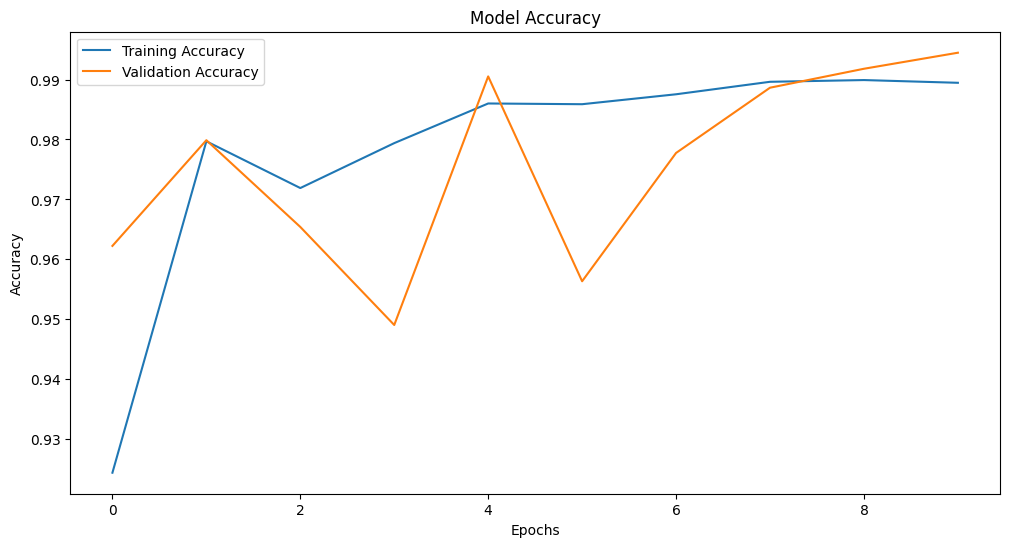

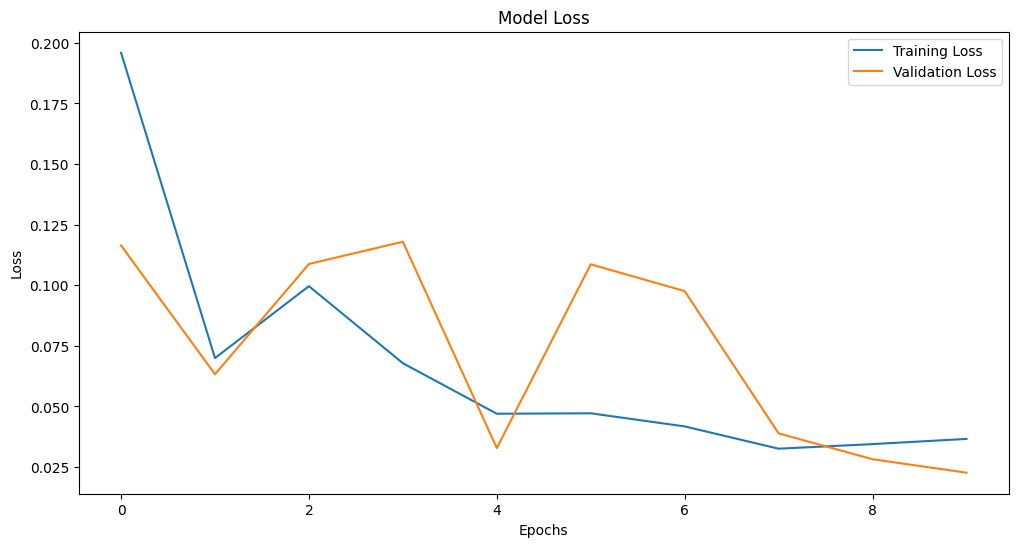

In [35]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Label the data using revised logic
def label_stress(hr):
    if hr > 0.4:  # High stress
        return 'High'
    elif hr > 0.2:  # Moderate stress
        return 'Moderate'
    else:  # Low stress
        return 'Low'

# Apply the labeling logic
labels = []
for window in segments:
    avg_hr = np.mean(window[:, all_data_resampled_scaled.columns.get_loc('HR')])  # Average HR in window
    labels.append(label_stress(avg_hr))

# Convert labels to a NumPy array
labels = np.array(labels)

# Check the distribution of labels
print("Label Distribution:", Counter(labels))

# Step 2: Balance the dataset
# Separate the data by class
low_indices = np.where(labels == 'Low')[0]
moderate_indices = np.where(labels == 'Moderate')[0]
high_indices = np.where(labels == 'High')[0]

# Determine the target size for each class
target_size = max(len(low_indices), len(moderate_indices), len(high_indices))

# Oversample each class to balance the dataset
low_oversampled = resample(low_indices, replace=True, n_samples=target_size, random_state=42)
moderate_oversampled = resample(moderate_indices, replace=True, n_samples=target_size, random_state=42)
high_oversampled = resample(high_indices, replace=True, n_samples=target_size, random_state=42)

# Combine oversampled indices and shuffle
balanced_indices = np.concatenate([low_oversampled, moderate_oversampled, high_oversampled])
np.random.shuffle(balanced_indices)

# Create balanced datasets
X_balanced = segments[balanced_indices]
y_balanced = labels[balanced_indices]

# Verify the balanced distribution
print("Balanced Label Distribution:", Counter(y_balanced))

# Step 3: Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

print("Training set shape (X):", X_train.shape)
print("Testing set shape (X):", X_test.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (y):", y_test.shape)

# Step 4: Save the balanced dataset and splits
np.save('/content/drive/MyDrive/HCI_Data/X_balanced.npy', X_balanced)
np.save('/content/drive/MyDrive/HCI_Data/y_balanced.npy', y_balanced)
np.save('/content/drive/MyDrive/HCI_Data/X_train.npy', X_train)
np.save('/content/drive/MyDrive/HCI_Data/X_test.npy', X_test)
np.save('/content/drive/MyDrive/HCI_Data/y_train.npy', y_train)
np.save('/content/drive/MyDrive/HCI_Data/y_test.npy', y_test)

print("Balanced dataset and splits saved successfully!")

# Step 5: Define and train an LSTM model
# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Encode string labels to integers for TensorFlow
label_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
y_train_encoded = np.array([label_mapping[label] for label in y_train])
y_test_encoded = np.array([label_mapping[label] for label in y_test])

# Train the model
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=10, batch_size=32)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", accuracy)

# Step 7: Classification Report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Decode numeric predictions back to string labels
inverse_label_mapping = {v: k for k, v in label_mapping.items()}
y_pred_decoded = [inverse_label_mapping[pred] for pred in y_pred_labels]
y_test_decoded = [inverse_label_mapping[true] for true in y_test_encoded]

# Generate classification report
print(classification_report(y_test_decoded, y_pred_decoded, target_names=['Low', 'Moderate', 'High']))

# Step 8: Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





Model saved successfully!
Model loaded successfully!
515/515 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step


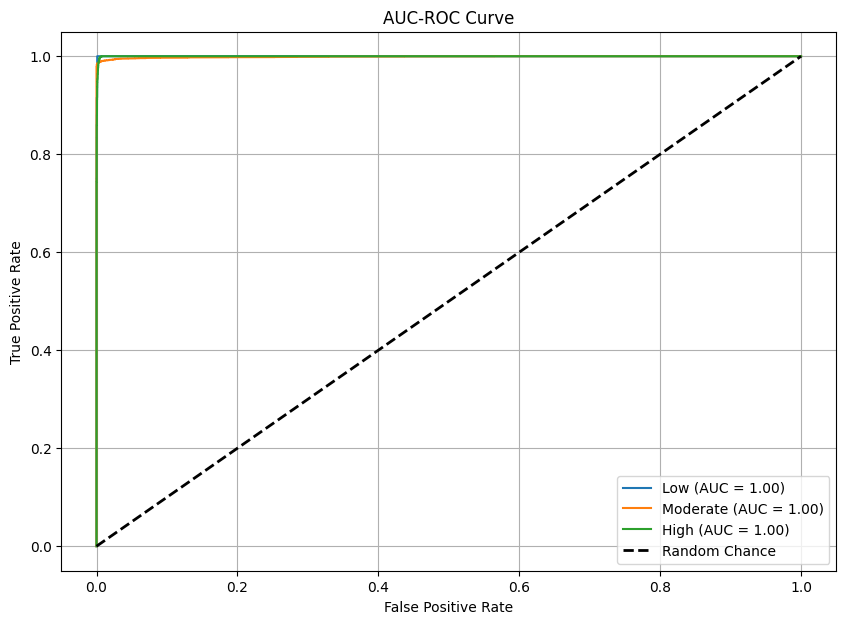

In [36]:
# Save the trained model
model.save('/content/drive/MyDrive/HCI_Data/stress_lstm_model.h5')

print("Model saved successfully!")

from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/HCI_Data/stress_lstm_model.h5')

# Confirm that the model is loaded
print("Model loaded successfully!")

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for AUC-ROC
y_test_binarized = label_binarize(y_test_encoded, classes=[0, 1, 2])
y_pred_probs = model.predict(X_test)  # Predicted probabilities

# Plot the ROC curve for each class
plt.figure(figsize=(10, 7))
for i, class_name in enumerate(['Low', 'Moderate', 'High']):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Chance')

# Add labels and legend
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()
